# 學生基本資料

In [155]:
from datetime import date
cname = "資管二甲"  
name = "江品叡" 
id = "B0809084" 
today = date.today()

print('{},  {},  {},  {}' .format(cname, name, id, today))

資管二甲,  江品叡,  B0809084,  2020-12-02


# 上傳檔案

In [156]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

# 導入模組 及 csv檔案

In [157]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
# from __future__ import absolute_import, division, print_function, unicode_literals

print("Tensor version: {}" .format(tf.__version__))
print("Eager execution: {}" .format(tf.executing_eagerly()))  # Tensorflow預設的開發環境

Tensor version: 2.3.0
Eager execution: True


In [158]:
'''
train_dataset_url = "http://mldata.io/get-data/dataset/original-data/gender_voice"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)
'''

train_dataset_fp = "/content/drive/MyDrive/Colab_Notebooks/Gender_Voice/gender_voice_weka_dataset.csv"
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /content/drive/MyDrive/Colab_Notebooks/Gender_Voice/gender_voice_weka_dataset.csv


## 查看資料 前5行

In [159]:
!head -n5 {train_dataset_fp}
# 查看前5行

meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0.059780985,0.064241268,0.032026913,0.015071489,0.09019344,0.075121951,12.86346184,274.4029055,0.893369417,0.491917766,0,0.059780985,0.084279106,0.015701668,0.275862069,0.0078125,0.0078125,0.0078125,0,0,0
0.06600874,0.067310029,0.040228735,0.019413867,0.09266619,0.073252323,22.42328536,634.6138545,0.892193242,0.513723843,0,0.06600874,0.107936554,0.015825915,0.25,0.009014423,0.0078125,0.0546875,0.046875,0.052631579,0
0.077315503,0.083829421,0.036718459,0.008701057,0.131908017,0.123206961,30.75715458,1024.927705,0.846389092,0.478904979,0,0.077315503,0.098706262,0.015655577,0.271186441,0.007990057,0.0078125,0.015625,0.0078125,0.046511628,0
0.151228092,0.072110587,0.158011187,0.096581728,0.207955252,0.111373524,1.232831276,4.17729621,0.963322462,0.727231799,0.083878185,0.151228092,0.088964849,0.017797553,0.25,0.201497396,0.0078125,0.5625,0.5546875,0.247119078,

# column_names, features, label

## 建立column_names 及 features與labels

In [160]:
# column order in CSV file
column_names = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
Label: label


## 建立class_names

In [161]:
class_names = ['male', 'female']

# 批量資料

## 讀入批量資料

In [162]:
batch_size = 32 # 一次性讀入多少批量的資料

# mack_csv_dataset 將CSV格式的文本文件解析為合適的格式
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

# num_epochs = N  表示將這個數據集中的資料讀取N遍

## 輸出

In [163]:
# make_csv_dataset函數返回tf.data.Dataset的(features, label)對，其中features是一個字典：{‘feature_name’: value}
features, labels = next(iter(train_dataset))

print(features)
# 查看batch裡的特徵
# 相同的特徵被放在同一個數組中，數組維度爲batch_size大小
print(labels)

OrderedDict([('meanfreq', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.21459435, 0.19643237, 0.11072728, 0.1864035 , 0.18448438,
       0.1554347 , 0.20631884, 0.19424975, 0.17062494, 0.20409602,
       0.19638923, 0.09672528, 0.21014172, 0.1442573 , 0.20230962,
       0.15507646, 0.19262883, 0.22971797, 0.14441854, 0.17246106,
       0.20639285, 0.18596134, 0.18348125, 0.165553  , 0.22666882,
       0.18662596, 0.16768473, 0.1527528 , 0.11777771, 0.22469819,
       0.16274537, 0.21633205], dtype=float32)>), ('sd', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.04153496, 0.03125658, 0.08755724, 0.0628012 , 0.04527246,
       0.06193354, 0.04253769, 0.03711048, 0.07266748, 0.06719915,
       0.05809684, 0.08379954, 0.03804022, 0.07759062, 0.03602827,
       0.06075511, 0.0778487 , 0.03838037, 0.08697115, 0.05925776,
       0.05319705, 0.06148264, 0.03157575, 0.05639552, 0.04084715,
       0.06245802, 0.06114903, 0.0623871 , 0.07952756, 0.03329758,
       0.06312488, 

## 輸出結果可視化

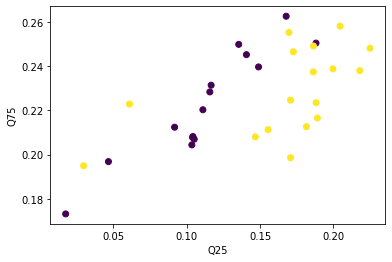

In [164]:
plt.scatter(features['Q25'],
      features['Q75'],
      c=labels,
      cmap='viridis')

plt.xlabel("Q25")
plt.ylabel("Q75")
plt.show()

# 重構features

In [165]:
# 把同一個數據的不同feature放在同一個數組中，我們使用tf.pack()來將features重構爲(batch_size, num_features)形狀
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)  # 將矩陣相同項重構為新的矩陣
    return features, labels

In [166]:
# 使用tf.data.Dataset.map將重構函數運用到每條數據中。
train_dataset = train_dataset.map(pack_features_vector)
# 查看前5個數據
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[1.83464661e-01 7.43383244e-02 1.89102769e-01 1.29265904e-01
  2.53964096e-01 1.24698207e-01 1.71073937e+00 5.77009821e+00
  9.45124149e-01 6.30812645e-01 2.66296893e-01 1.83464661e-01
  1.54437035e-01 4.76190485e-02 2.69662917e-01 9.27688956e-01
  2.34375000e-02 5.32031250e+00 5.29687500e+00 1.44271076e-01]
 [1.24882638e-01 7.78078362e-02 1.13887638e-01 6.88988790e-02
  2.01033711e-01 1.32134825e-01 3.99039030e+00 2.43606968e+01
  9.27986562e-01 6.17385507e-01 0.00000000e+00 1.24882638e-01
  1.16250895e-01 1.74102299e-02 2.58064508e-01 1.49414062e-01
  7.81250000e-03 7.34375000e-01 7.26562500e-01 1.98156685e-01]
 [2.07022473e-01 6.26491457e-02 2.40117475e-01 1.39383256e-01
  2.61908948e-01 1.22525699e-01 1.98664379e+00 6.62617731e+00
  8.70279670e-01 2.74150103e-01 2.61497796e-01 2.07022473e-01
  1.20236859e-01 4.69208211e-02 2.77456641e-01 6.90937519e-01
  2.34375000e-02 2.67187500e+00 2.64843750e+00 1.06579453e-01]
 [1.96432367e-01 3.12565826e-02 1.96756750e-01 1.8162162

# Keras創建模型

## 構建線性模型

In [167]:
# 構建線性模型
# 兩個Dense層各有50個節點，一個輸出層有2個節點代表標籤預測，兩個隱藏層
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu',input_shape=(20,)),  # input shape required. My dataset contains 20 features/variables
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [168]:
# 預測前5項
prediction = model(features)
prediction[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[3.1683288 , 1.3372567 ],
       [4.485548  , 0.54793143],
       [2.416274  , 0.6775751 ],
       [3.691671  , 1.0580223 ],
       [1.6445477 , 0.22364467]], dtype=float32)>

## 多分類任務 softmax進行歸一化

In [169]:
# 多分類任務需要使用softmax進行歸一化
# softmax 使每一個元素範圍都在(0,1)之間，且所有元素和為1
tf.nn.softmax(prediction)[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.86188936, 0.1381106 ],
       [0.9808781 , 0.01912185],
       [0.8505217 , 0.14947826],
       [0.932996  , 0.067004  ],
       [0.80547994, 0.19452007]], dtype=float32)>

## argmax獲取概率最大的類標籤

In [170]:
# 使用tf.argmax獲取概率最大的類標籤
print('prediction:', tf.argmax(prediction, axis=1))
print('label:', labels)

prediction: tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)
label: tf.Tensor([0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1], shape=(32,), dtype=int32)


# 訓練模型

## 損失函數

In [171]:
# 損失函數
loss_object=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
'''
from_logits=True 網路預測值y_pred 須為還沒經過softmax函數的輸出值
將softmax激活函數實現在損失函數中，便不須手動添加softmax損失函數，提升數值運算穩定性
'''

'\nfrom_logits=True 網路預測值y_pred 須為還沒經過softmax函數的輸出值\n將softmax激活函數實現在損失函數中，便不須手動添加softmax損失函數，提升數值運算穩定性\n'

## 獲取損失函數

In [172]:
# 獲取損失
# train_dataset_fp = pd.read_csv(train_dataset_fp, names=column_names, skipinitialspace=True, skiprows=1, engine="python")

def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)
l = loss(model, features, labels)
print(l)

tf.Tensor(1.2925699, shape=(), dtype=float32)


## GradientTape計算loss對所有變量的梯度

In [173]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

# 創建優化器

## 設置迭代

In [174]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

## 優化器使用

In [175]:
loss_value, grads = grad(model, features, labels)
print('步數：{}, 初始loss值：{}'.format(optimizer.iterations.numpy(),
                                loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print('步數：{}, loss值：{}'.format(optimizer.iterations.numpy(),
                                loss(model,features, labels).numpy()))

步數：0, 初始loss值：1.292569875717163
步數：1, loss值：1.0054258108139038


# 訓練循環

## 訓練每個epoch數據

In [176]:
# 保存loss和acc
train_loss_results=[]
train_accuracy_results=[]

num_epochs =201 # epoch 為所有樣本訓練過N遍
for epoch in range(num_epochs):
    # 用於記錄loss和acc的類
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # 訓練循環
    for x, y in train_dataset:
        # 獲取loss和梯度
        loss_value, grads = grad(model, x, y)
        # 梯度優化
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # 記錄loss均值
        epoch_loss_avg(loss_value)
        # 記錄準確率
        epoch_accuracy(y, model(x))

    # 保存每個epoch的loss和acc
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                        epoch_loss_avg.result(),
                                        epoch_accuracy.result()))

Epoch 000: Loss: 0.929, Accuracy: 50.126%
Epoch 050: Loss: 0.168, Accuracy: 95.202%
Epoch 100: Loss: 0.146, Accuracy: 95.486%
Epoch 150: Loss: 0.128, Accuracy: 96.402%
Epoch 200: Loss: 0.114, Accuracy: 96.780%


## 可視化訓練過程

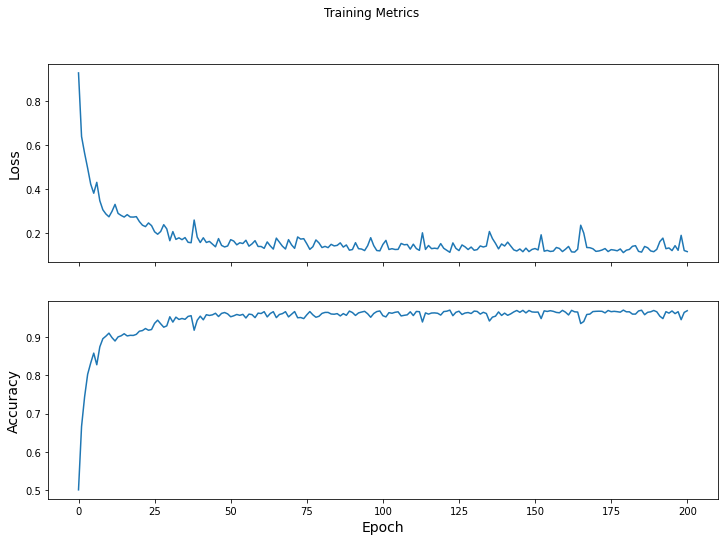

In [177]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# 使用訓練的模型進行預測

In [178]:
predict_dataset = tf.convert_to_tensor([
    [0.151228092,	0.072110587,	0.158011187,	0.096581728,	0.207955252,	0.111373524,	1.232831276,	4.17729621,	0.963322462,	0.727231799,	0.083878185,	0.151228092,	0.088964849,	0.017797553,	0.25,	0.201497396,	0.0078125,	0.5625,	0.5546875,	0.247119078,],
    [0.164310868,	0.053803364,	0.173873874,	0.165585586,	0.185405405,	0.01981982,	4.928656441,	32.09187455,	0.867461182,	0.423831175,	0.173693694,	0.164310868,	0.15177942,	0.011037528,	0.181818182,	0.229130498,	0.034179688,	0.712890625,	0.678710938,	0.223851688,],
    [0.190235564,	0.057793186,	0.205779087,	0.138271605,	0.236790123,	0.198518564,	1.09306769,	42.577716836,	1.924571293,	3.361180501,	0.305728336,	0.190235564,	0.116813538,	0.047058824,	0.277456647,	1.262222782,	0.140625,	1.1640625,	0.0234375,	0.111100228,]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: male (97.4%)
Example 1 prediction: female (100.0%)
Example 2 prediction: female (100.0%)
